In [2]:
######################
##  Library Imports
######################
import matplotlib as mpl
# mpl.use('TkAgg') # Use this backend for displaying plots in window
# mpl.use('Agg') # Use this backend for writing plots to file

import matplotlib.pyplot as plt
# plt.style.use('seaborn-talk')
# mpl.rcParams['figure.figsize']    = [12, 7]
# mpl.rcParams['figure.autolayout'] = True
mpl.rcParams['text.usetex']       = True
mpl.rcParams['font.family']       = 'serif'
mpl.rcParams['font.serif']        = 'Computer Modern Roman'
# mpl.rcParams['axes.labelsize']    = 6
mpl.rcParams['font.size']         = 16
mpl.rcParams['lines.linewidth']   = 1.75
# mpl.rcParams['lines.markersize']  = 6
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import h5py
import sys
import os
import time as TIME
import pandas as pd
# import multiprocessing as mprocs
# from threading import Thread
# from subprocess import Popen, PIPE
# from mpl_toolkits.axes_grid1 import make_axes_locatable
from itertools import zip_longest
from matplotlib.gridspec import GridSpec
from matplotlib.pyplot import cm 
import numpy as np
from numba import jit, njit, prange
import itertools 
# from scipy.stats import linregress
# from numpy.polynomial.polynomial import polyfit

from functions import open_file, read_in_triads

In [25]:
@njit
def normalize_time_order(order, kmin, maximum):

    ## Get params
    num_t_steps = order.shape[0]
    num_osc     = order.shape[1]
    
    norm_order = np.ones((num_t_steps, num_osc)) * np.complex(0.0, 0.0)
    for t in range(num_t_steps):
        for k in range(kmin, num_osc):
            norm_order[t, k] = order[t, k] / maximum

    return norm_order


@njit
def compute_time_order(order, kmin):

    ## Get params
    num_t_steps = order.shape[0]
    num_osc     = order.shape[1]

    tmp_time_order = np.ones((num_osc, )) * np.complex(0.0, 0.0)   
    time_order     = np.ones((num_t_steps, num_osc)) * np.complex(0.0, 0.0) 

    t_count = 1
    for t in range(num_t_steps):
        for k in range(kmin, num_osc):
            tmp_time_order[k] += np.exp(np.complex(0.0, 1.0) * np.angle(order[t, k]))
            time_order[t, k] = tmp_time_order[k] / t_count
        t_count += 1

    return time_order

In [26]:
#########################
##  Get Input Parameters
#########################
k0    = 1
N     = [256]
alpha = [1.5]
beta  = 0.0
u0    = 'RANDOM'
iters = int(1e5)
trans = int(1e5)

kmin    = k0 + 1
num_osc = int(N[0] / 2) + 1
kmax    = int(N[0] / 2)

######################
##  Input & Output Dir
######################
input_dir  = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/RESULTS"
output_dir = "/work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/Snapshots/PhaseOrder/Investigate"


## Open file
file = open_file(alpha[0], N[0], k0, beta, u0, iters, trans, input_dir)

a = 1.500 || Filename: /work/projects/TurbPhase/burgers_1d_code/Burgers_PO/Data/RESULTS/RESULTS_N[256]_k0[1]_ALPHA[1.500]_BETA[0.000]_u0[RANDOM]/SolverData_ITERS[100000]_TRANS[10000].h5


In [27]:
## Read in data
time    = file["Time"][:]
amps    = file["Amps"][:]
phases  = file["Phases"][:, :]
order   = file["PhaseShiftScaleOrderParam"][:, :]
solver_time_order = file["ThetaTimeScaleOrderParam"][:, :]
R_k_avg = file["R_k_avg"][:]
triads_solver = read_in_triads(file)
## Close file
file.close()

In [28]:
## Compute time order
time_order = compute_time_order(order, k0 + 1)

## Compute normed time order
normed_order = normalize_time_order(order, k0 + 1, np.amax(order))

## Compute time order
normed_time_order = compute_time_order(normed_order, k0 + 1)

## Compute R_k
r_k = np.absolute(time_order[-1, :])
normed_r_k = np.absolute(normed_time_order[-1, :])

In [41]:
t = 500
scale = 0.75

In [42]:
r    = 1
thet = np.linspace(0.0, 2.0*np.pi, 100)

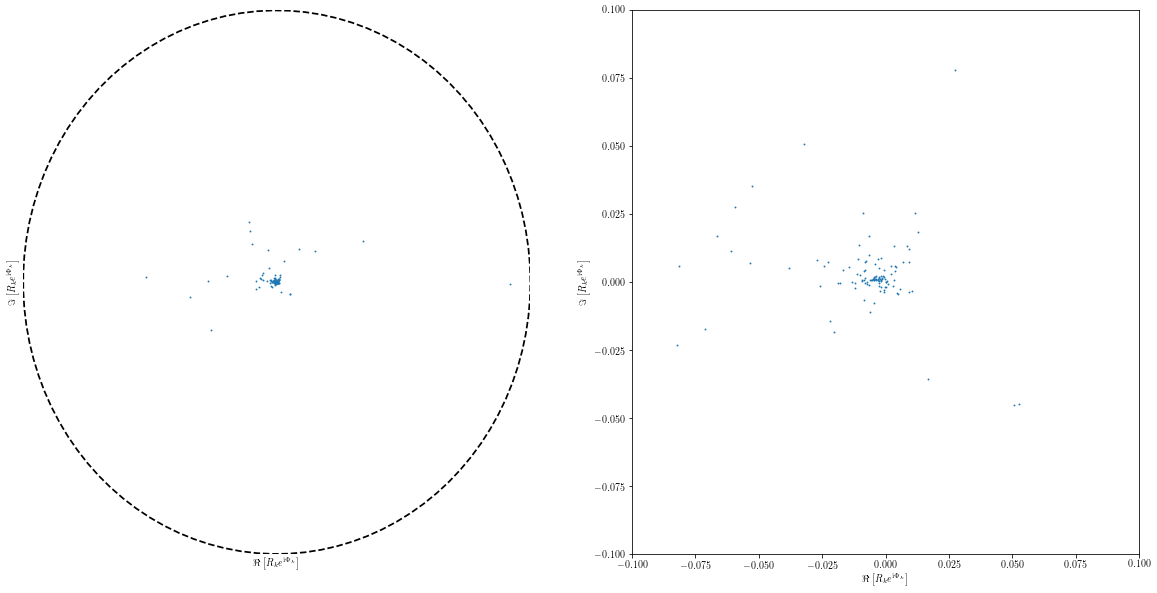

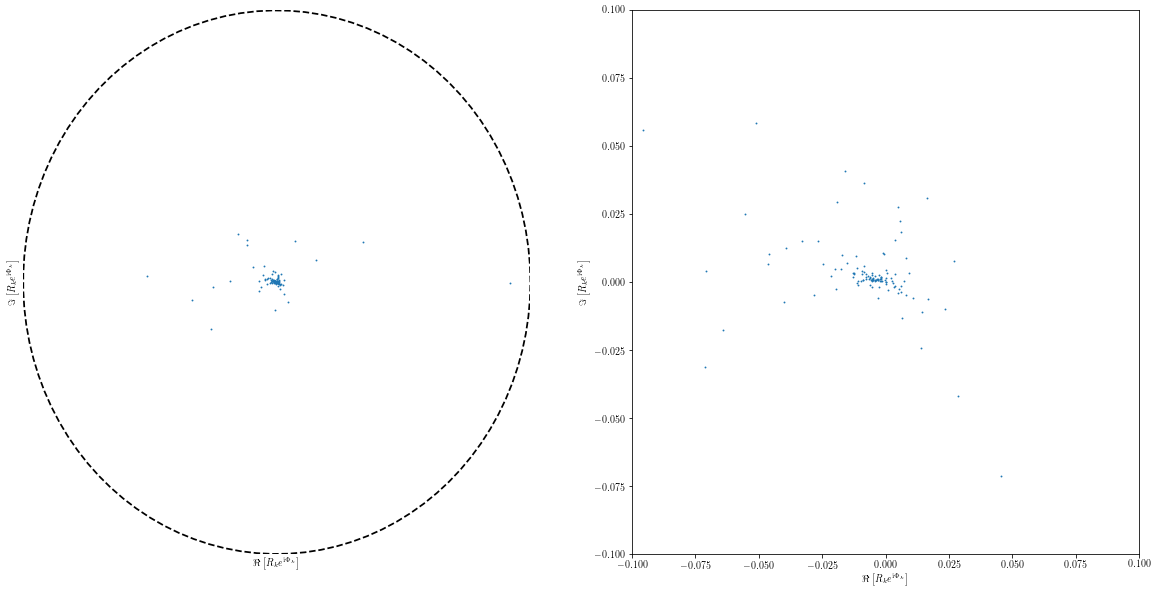

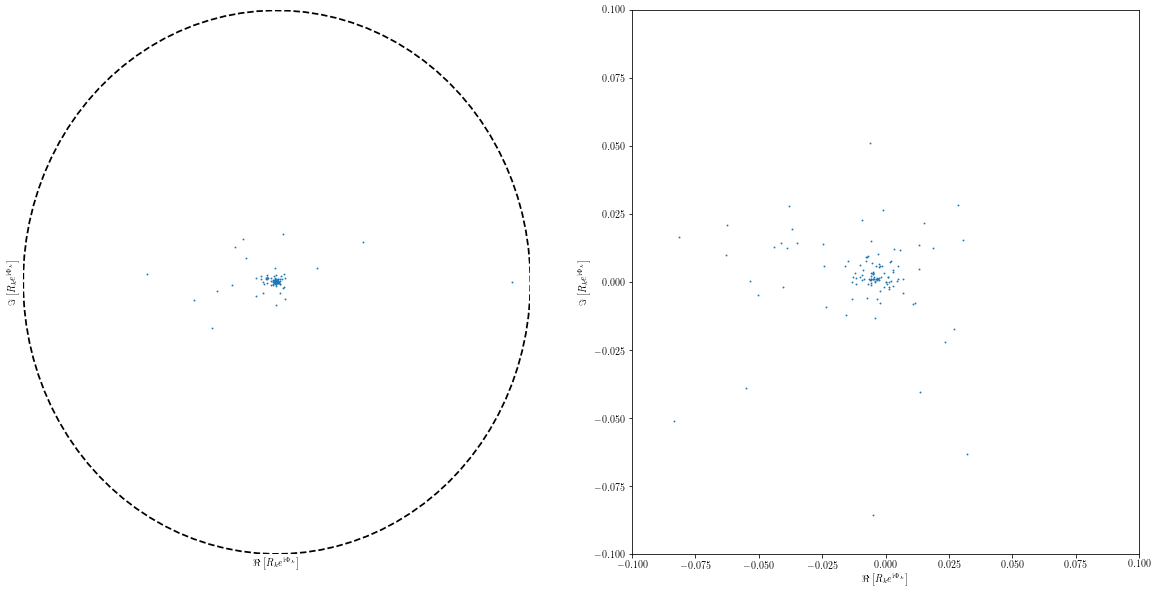

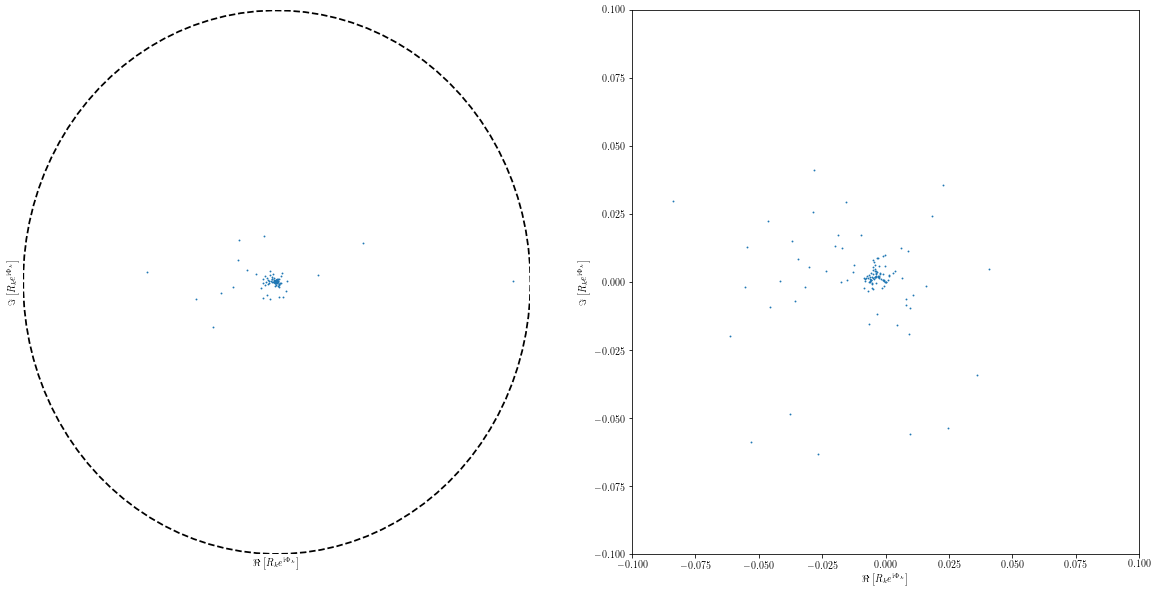

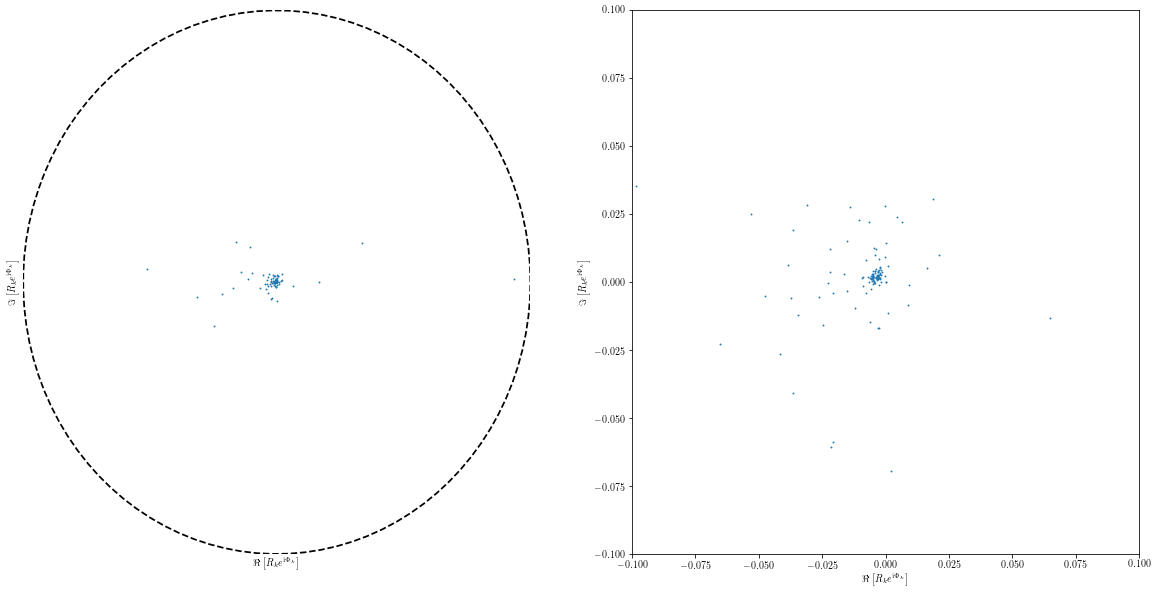

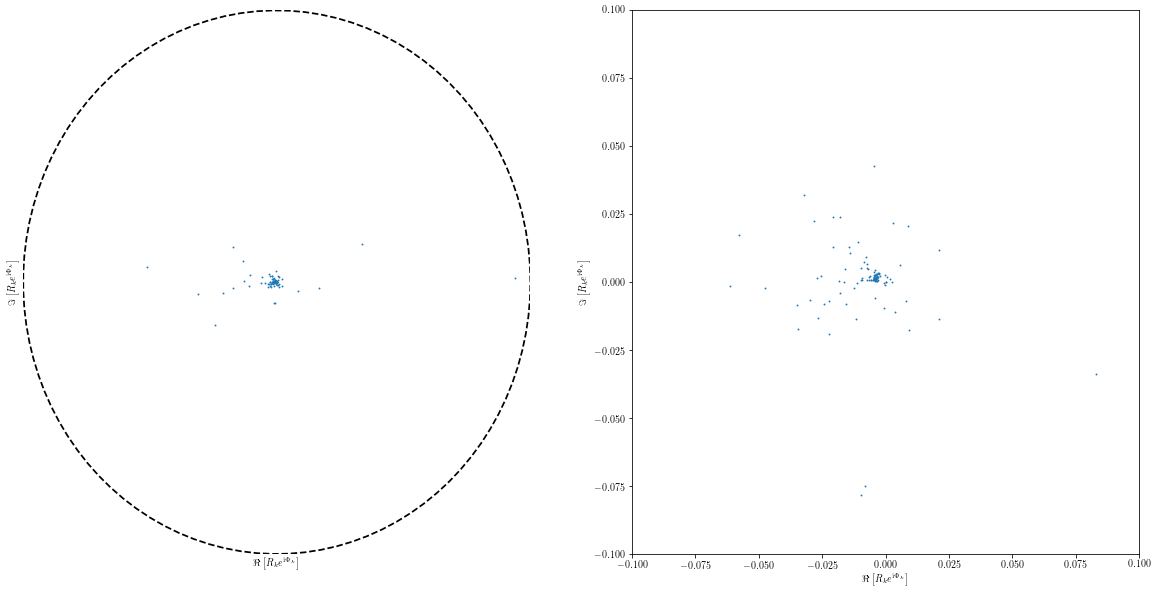

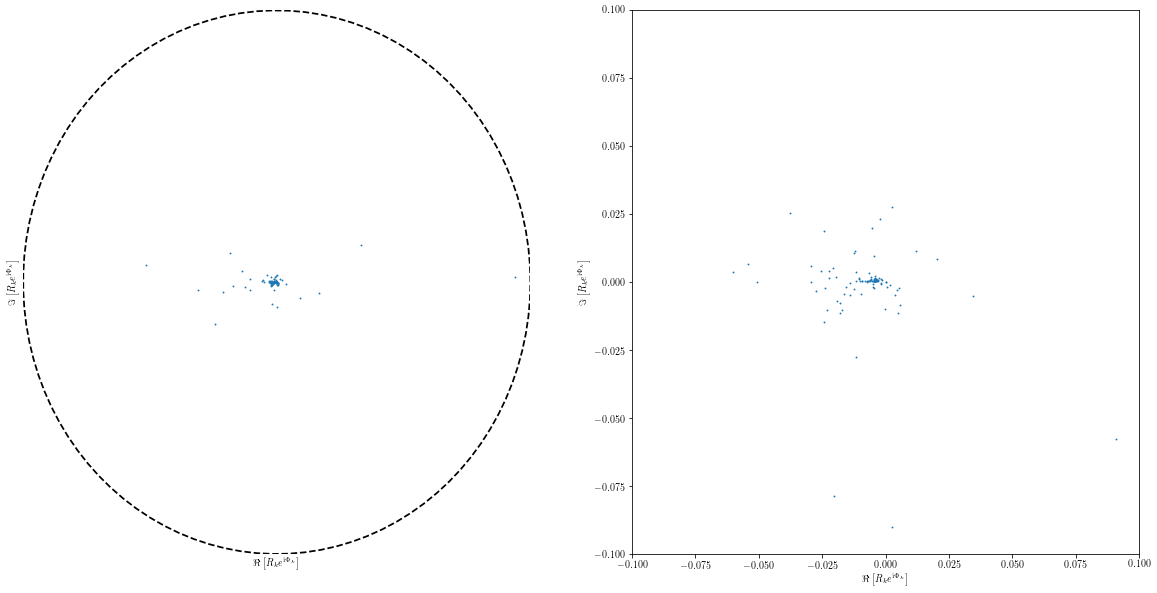

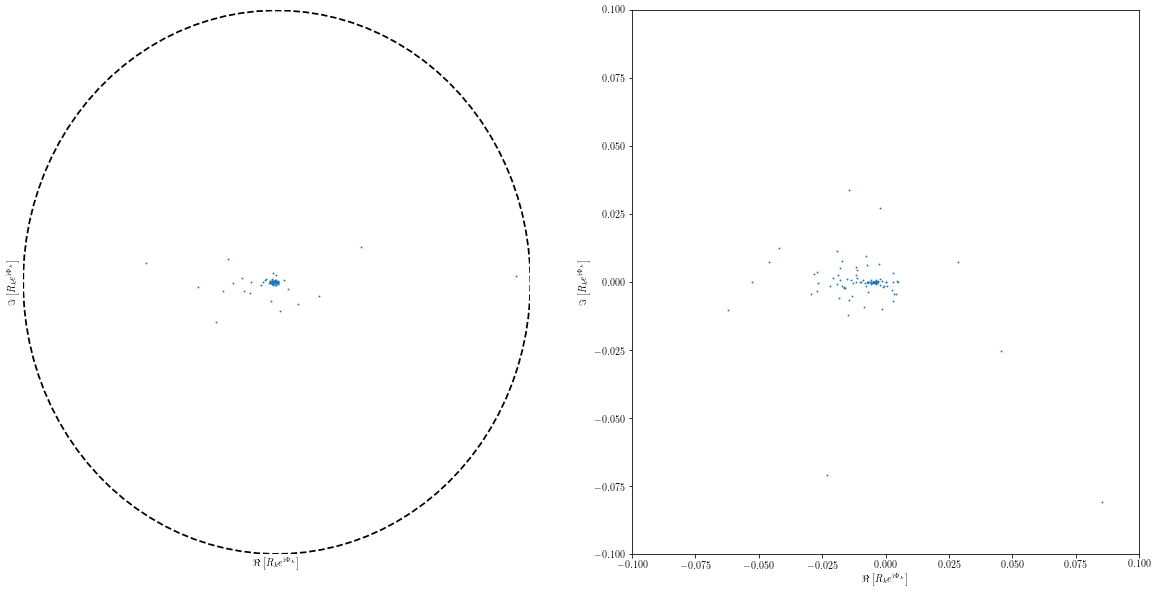

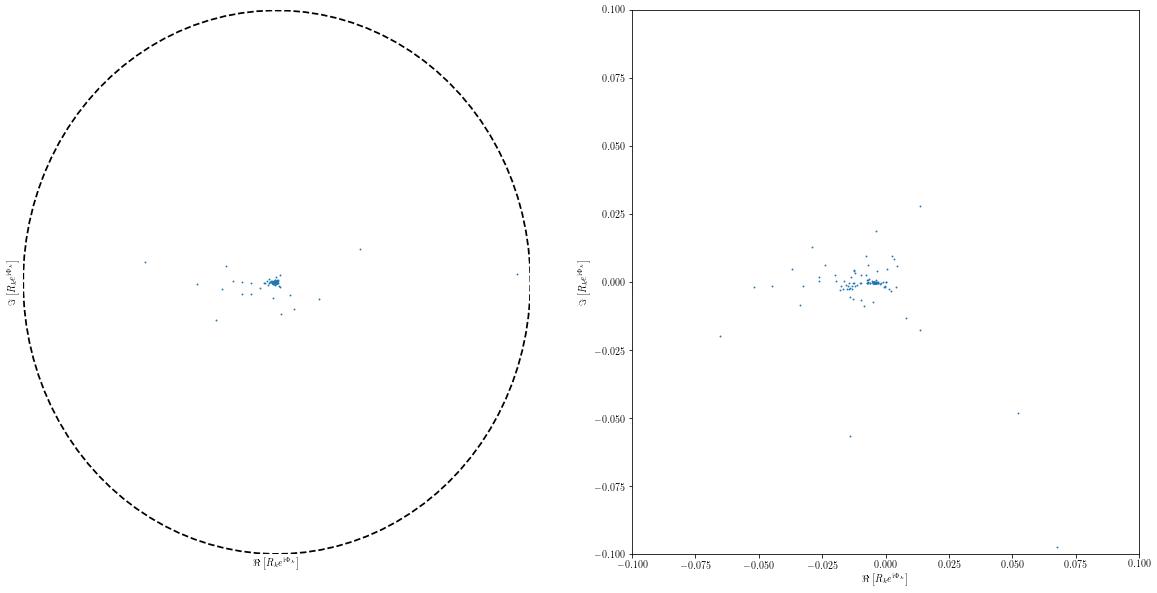

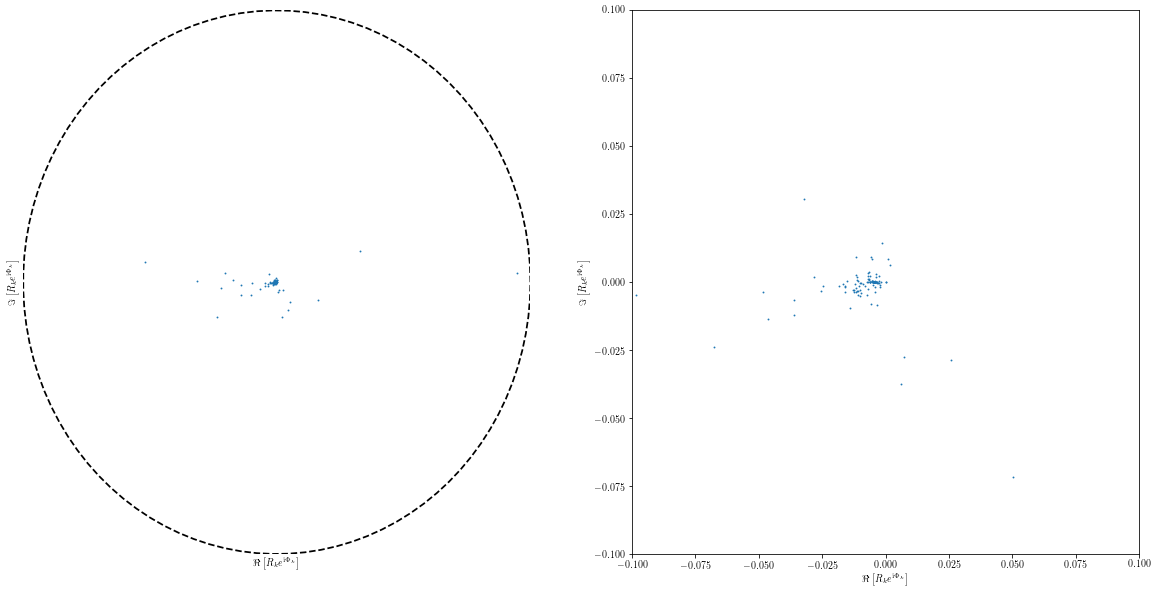

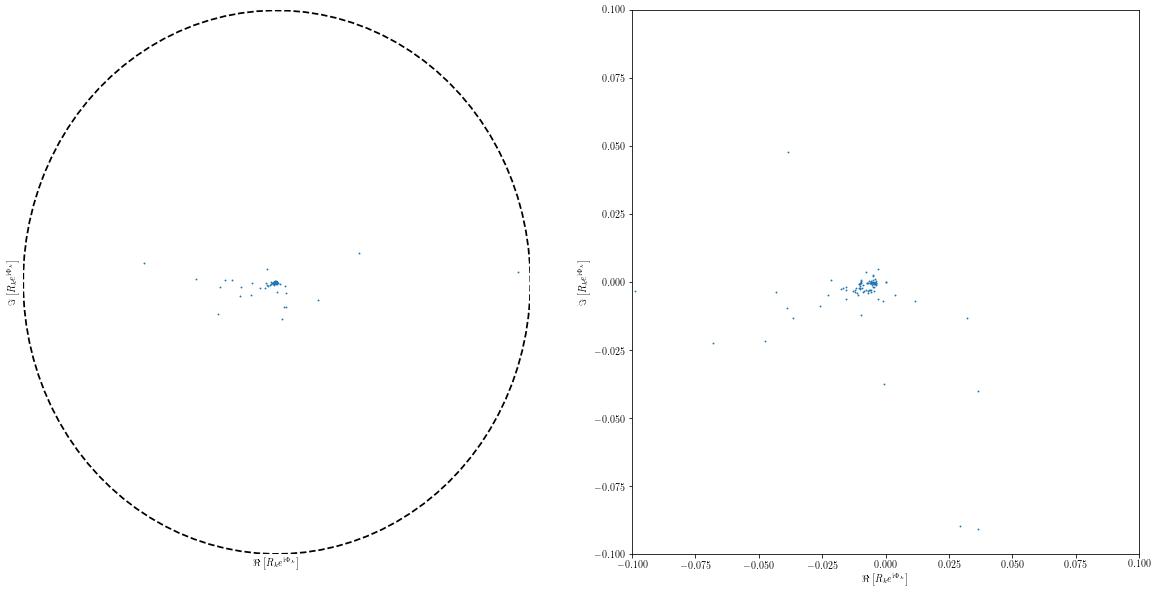

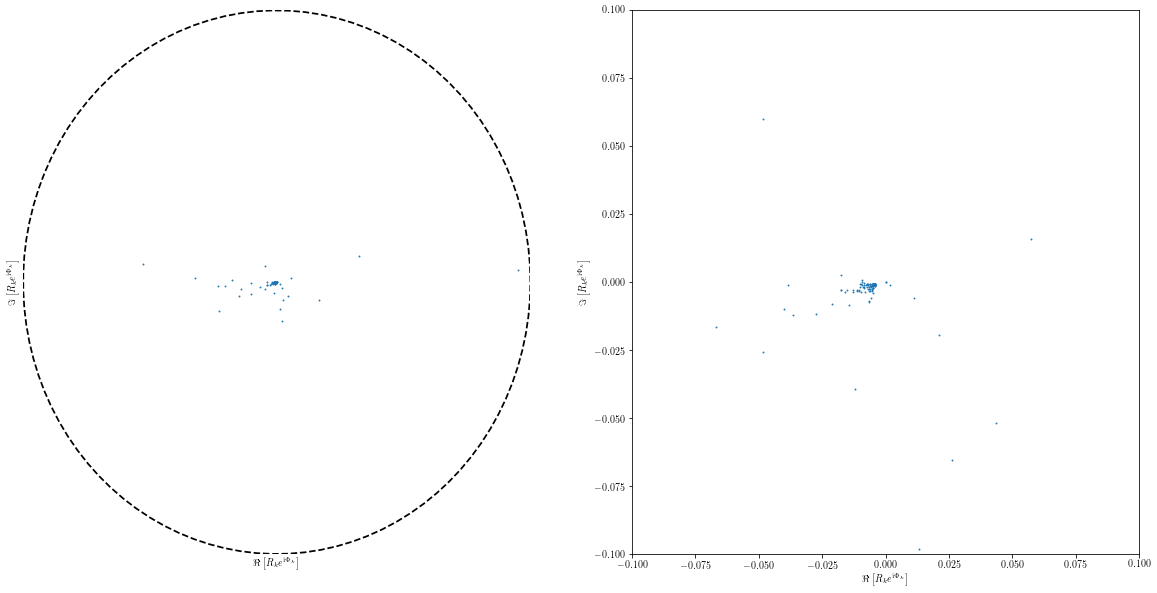

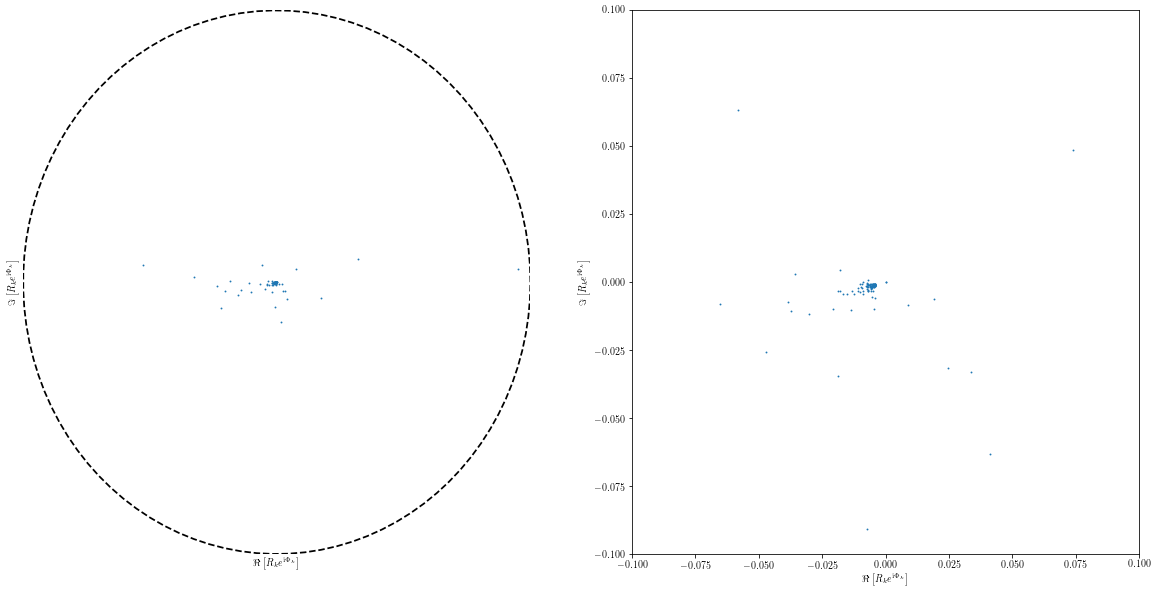

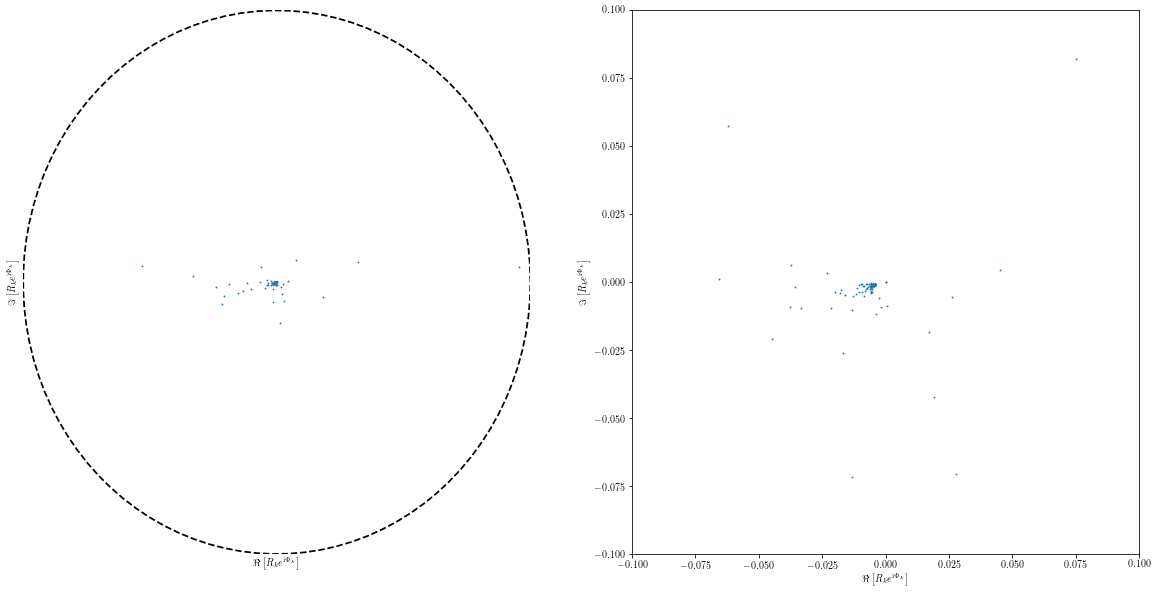

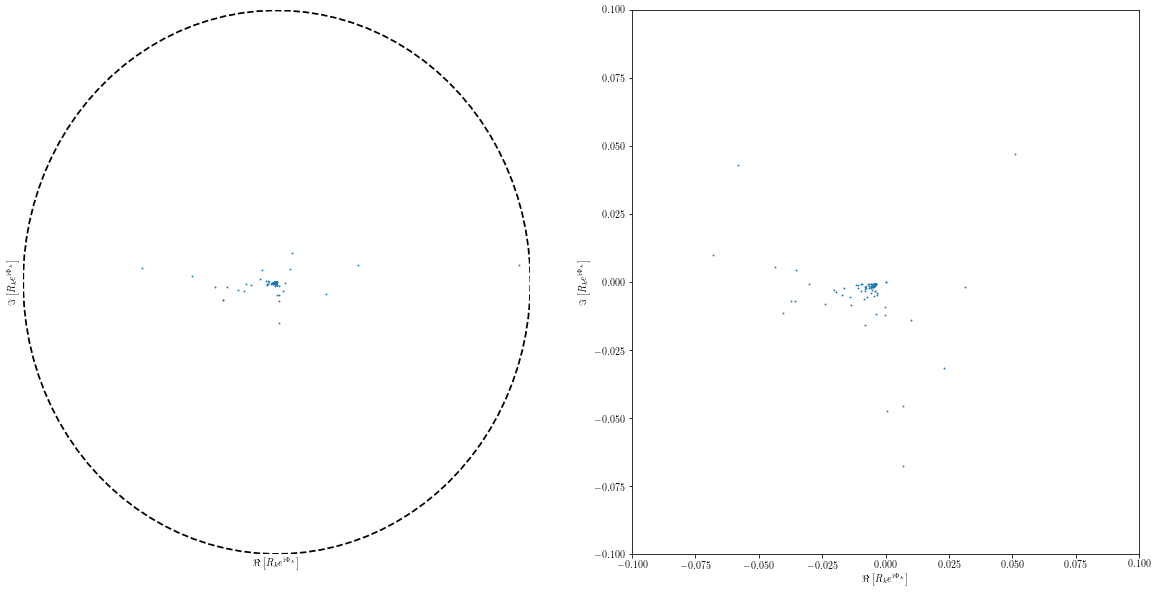

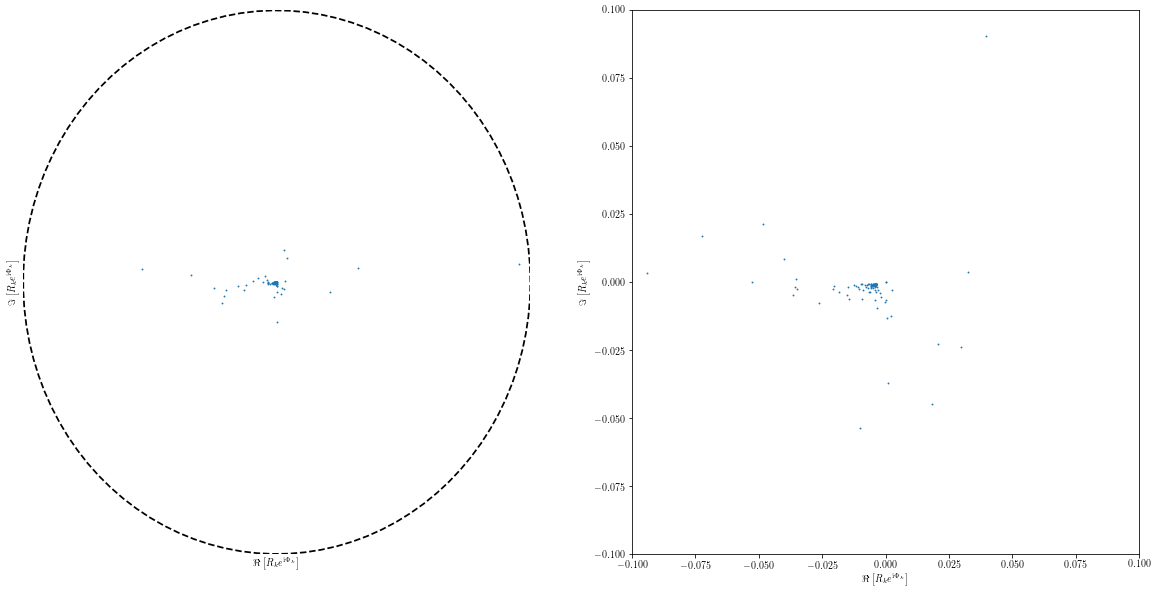

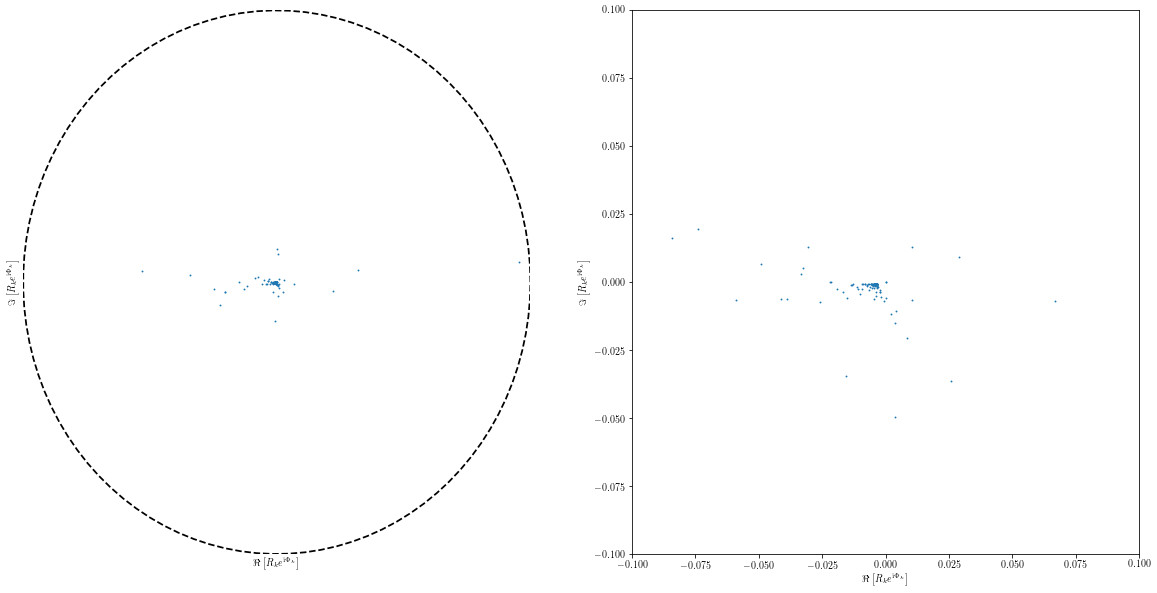

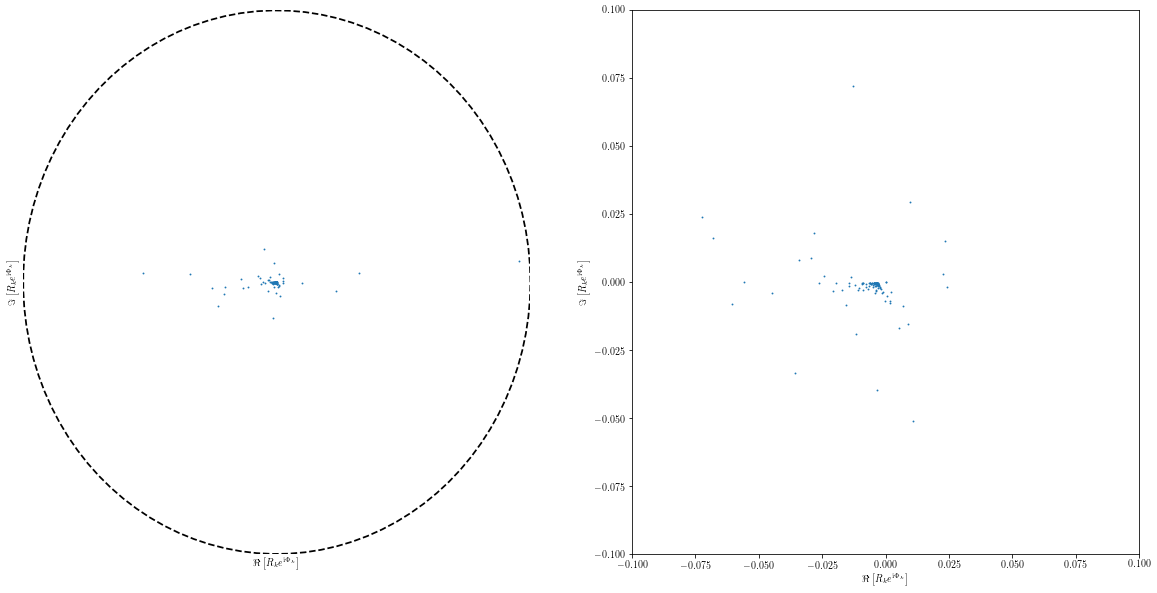

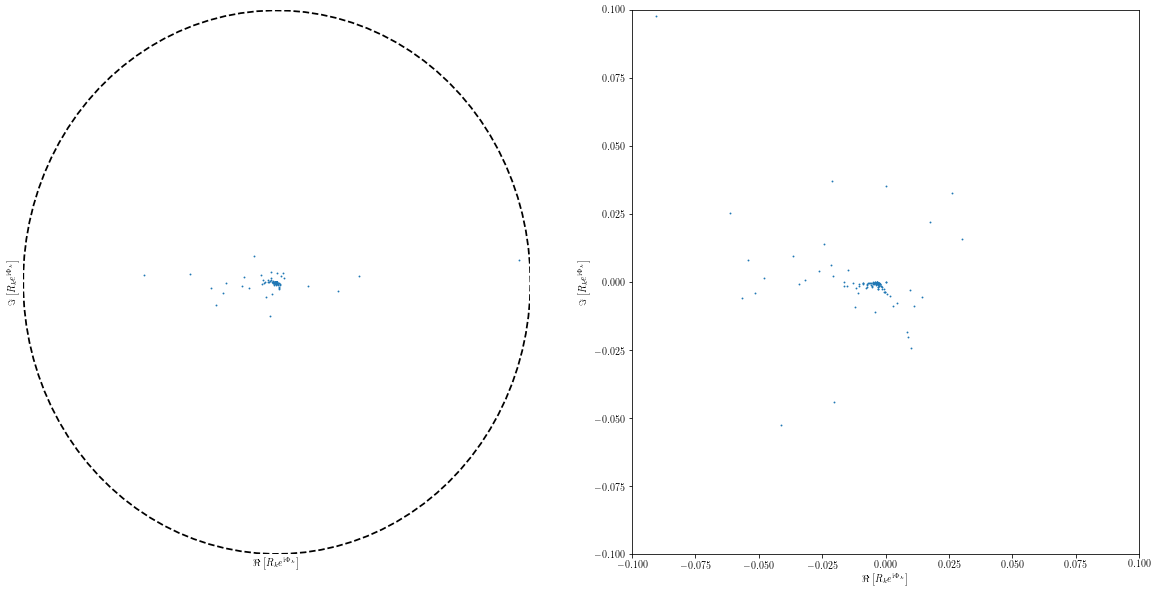

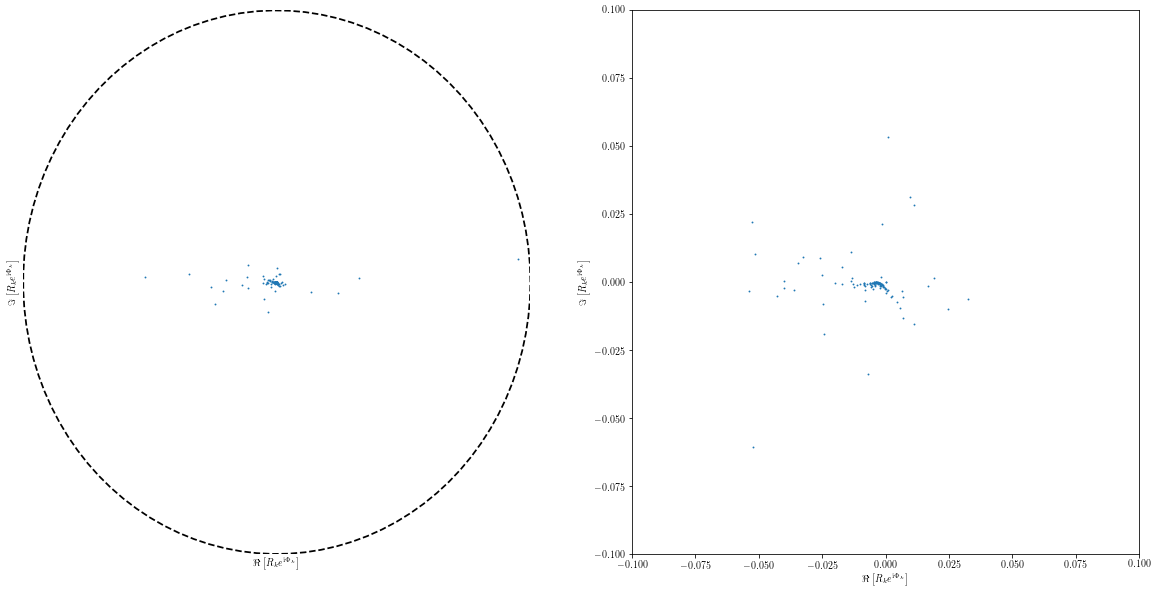

In [46]:


for t in range(20):
    Rtilda_k = np.absolute(normed_order[t, :])
    theta_k  = np.angle(normed_order[t, :])
#     print(Rtilda_k)
    fig = plt.figure(figsize = (20, 10), tight_layout = False)
    gs  = GridSpec(1, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax1.plot(r * np.cos(thet), r * np.sin(thet), '--', color = 'black')
    ax1.scatter(Rtilda_k * np.cos(theta_k), Rtilda_k * np.sin(theta_k), s = scale) #, c = np.arange(len(R_k[t, :])), , cmap = my_mhsv)
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1, 1)
    ax1.set_xlabel(r"$\Re\left[R_{k} e^{\mathrm{i} \Phi_{k}}\right]$")
    ax1.set_ylabel(r"$\Im\left[R_{k} e^{\mathrm{i} \Phi_{k}}\right]$")
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.set_xticks([])
    ax1.set_yticks([])

    ax2 = fig.add_subplot(gs[0, 1])
    ax2.scatter(Rtilda_k * np.cos(theta_k), Rtilda_k * np.sin(theta_k), s = scale) #,c = np.arange(len(R_k[t, :])), s = scale, cmap = my_mhsv)
    ax2.set_xlim(-0.1, 0.1)
    ax2.set_ylim(-0.1, 0.1)
    ax2.set_xlabel(r"$\Re\left[R_{k} e^{\mathrm{i} \Phi_{k}}\right]$")
    ax2.set_ylabel(r"$\Im\left[R_{k} e^{\mathrm{i} \Phi_{k}}\right]$")

    plt.show()